Functions add a percantage to the top of each bar in count plots. 

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pixiedust

In [36]:
#%%pixie_debugger
def add_percentage_to_bar_plot(df,feature,plot,hue = None):
    '''
    add_percentage_to_bar_plot(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        feature : (string) feature name 
        ax: Axes object (for Seaborn Countplot/Bar plot or pandas bar plot)
        hue :(string) hue name , default --> None
    '''
    if hue == None:
        total = len(df[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2 - 0.10
            y = p.get_y() + p.get_height()+3
            ax.annotate(percentage, (x, y), size = 12)
        plt.show()
        
    else:
        number_of_categories = len([x for x in df[feature].unique() if x==x])
        number_of_hue_categories =  len([x for x in df[hue].unique() if x==x])
        
        count_values = [p.get_height() for p in plot.patches]        
        patches = [p for p in plot.patches]        
        for i in range(number_of_categories):
            total = df[feature].value_counts().values[i]
            for j in range(number_of_hue_categories):
                patch_index = (j*number_of_categories + i)                
                percentage = '{:.1f}%'.format(100 * count_values[patch_index]/total)
                x = patches[patch_index].get_x() + patches[patch_index].get_width() / 2 - 0.10
                y = patches[patch_index].get_y() + patches[patch_index].get_height() + 3
                ax.annotate(percentage, (x, y), size = 12)                     
        plt.show()
# source : https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn/31754317

In [26]:
# importing data
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


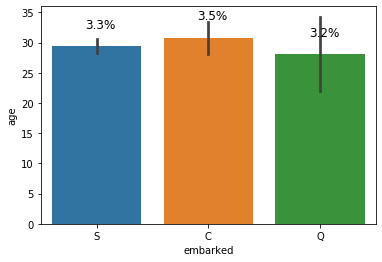

In [35]:
# adding % to the feature category bars
ax = sns.barplot(x='embarked',y='age',data=df)
add_percentage_to_bar_plot(df,'sex',ax)

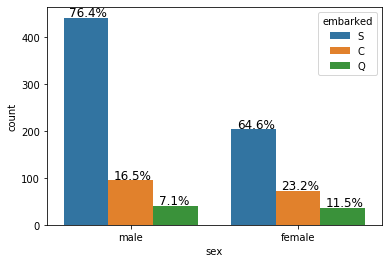

In [33]:
# adding % to the hue bars
ax = sns.countplot(x="sex",data=df,hue='embarked')
add_percentage_to_bar_plot(df,'sex',ax,'embarked')

In [31]:
# to understand : -->num_of_x=len([x for x in df[x_values].unique() if x==x])
np.nan == np.nan

False